<a href="https://colab.research.google.com/github/YanovaAdia/watsonnli_notebook/blob/main/watsonnli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers accelerate peft datasets

In [4]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch

In [5]:
train = pd.read_csv('/content/drive/MyDrive/watsonnli/train.csv')
test = pd.read_csv('/content/drive/MyDrive/watsonnli/test.csv')

In [ ]:
train.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language', 'label'], dtype='object')

In [ ]:
test.columns

Index(['id', 'premise', 'hypothesis', 'lang_abv', 'language'], dtype='object')

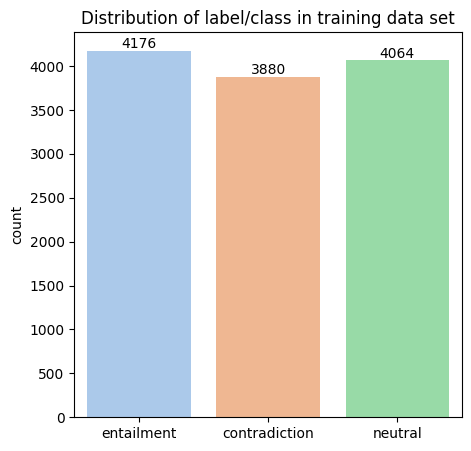

In [41]:

LABEL_NAME = ('entailment', 'contradiction', 'neutral')
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x=train['label'], hue=train['label'], palette='pastel', legend=False)
ax.set_xticks([0,1,2])
ax.set_xticklabels(LABEL_NAME)
ax.set(xlabel=None, title='Distribution of label/class in training data set')
for container in ax.containers:
    ax.bar_label(container)

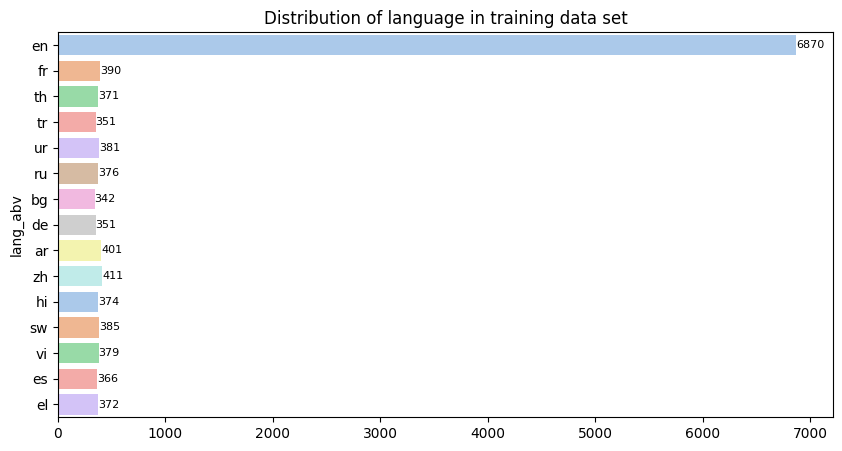

In [45]:
LABEL_NAME = ('entailment', 'contradiction', 'neutral')
f, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(y=train['lang_abv'], hue=train['lang_abv'], palette='pastel', legend=False)
ax.set(xlabel=None, title='Distribution of language in training data set')
for container in ax.containers:
    ax.bar_label(container, size=8)

In [7]:
train = train[['premise', 'hypothesis', 'label']]
test = test[['premise', 'hypothesis']]

In [9]:
from datasets import Dataset, load_metric
train_data = Dataset.from_pandas(train)
test_data = Dataset.from_pandas(test)

In [10]:
train_data

Dataset({
    features: ['premise', 'hypothesis', 'label'],
    num_rows: 12120
})

In [11]:
test_data

Dataset({
    features: ['premise', 'hypothesis'],
    num_rows: 5195
})